# Similarity

Similarity at pseudo-bulk level to Naive and Primed hESCs from GSE101074.

In [1]:
library(ggplot2)
library(reshape2)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

### Configs

In [3]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

rownames(cluster_config) = cluster_config$cluster
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#F4D5CD,Intermediate,12
2,2,#78A824,Pre-iPSC,15
3,3,#F01D35,Fibroblast-like,5
4,4,#E85F6D,Fibroblast-like,3
5,5,#B03743,Fibroblast,1
6,6,#7C2730,Fibroblast,2
7,7,#CF175A,Fibroblast-like,4
8,8,#CCCCCC,Doublets,17
9,9,#F7A6C2,Keratinocyte-like,6


### Load Cluster-wise Counts

In [4]:
cts = read.table("./data/clusters.counts.overlap.with_iPSC.merged.500.tsv", sep='\t', header=T)
rownames(cts) = paste(cts$chrom, paste(cts$start, cts$end, sep='-'), sep=":")

cts$chrom = NULL
cts$start = NULL
cts$end = NULL

# reorder to new clusters
cts = cts[, order(cluster_config$new_cluster)]
colnames(cts) = seq(1,ncol(cts))

# remove cluster with doublets
cts = cts[, colnames(cts)!=17]

dim(cts)
head(cts)

[1] 440574     17

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1:10355-10867,65,60,47,55,6,14,16,28,16,43,26,68,32,13,31,16,83
chr1:41995-42521,56,29,62,76,4,16,16,39,8,38,22,43,50,14,1,9,35
chr1:46067-46593,15,16,22,50,2,16,4,13,15,55,51,73,69,24,44,12,39
chr1:48475-48975,13,5,9,21,9,1,10,24,50,64,33,82,18,6,2,1,7
chr1:51286-52235,27,16,25,25,1,11,10,5,9,31,3,70,84,19,201,125,76
chr1:58648-59148,7,5,12,14,2,11,15,23,56,37,10,56,29,2,4,2,9


### Load Naive and Primed hESCs


In [5]:
hESC_cts = read.table("./data/GSE101074.counts.overlap.with_iPSC.merged.500.tsv", sep='\t', header=T)
rownames(hESC_cts) = paste(hESC_cts$chrom, paste(hESC_cts$start, hESC_cts$end, sep='-'), sep=":")
hESC_cts$chrom = NULL
hESC_cts$start = NULL
hESC_cts$end = NULL

dim(hESC_cts)
head(hESC_cts)

[1] 440574      2

,naive.hESC,primed.hESC
,<int>,<int>
chr1:10355-10867,39,10
chr1:41995-42521,37,27
chr1:46067-46593,55,18
chr1:48475-48975,27,14
chr1:51286-52235,496,34
chr1:58648-59148,22,14


In [6]:
all(rownames(cts) == rownames(hESC_cts))

[1] TRUE

## Correlations!

In [7]:
cor(hESC_cts, method='spearman')

,naive.hESC,primed.hESC
naive.hESC,1.0000000,0.7881279
primed.hESC,0.7881279,1.0000000


In [21]:
cor(log2(1+hESC_cts), method='pearson')

,naive.hESC,primed.hESC
naive.hESC,1.0000000,0.8451428
primed.hESC,0.8451428,1.0000000


In [8]:
spearman_corrs = cor(hESC_cts, cts,  method='spearman')
spearman_corrs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
naive.hESC,0.4689629,0.4575274,0.4862844,0.5117080,0.5393212,0.5658978,0.4914747,0.4078528,0.4406679,0.5571371,0.5862537,0.6235947,0.7207091,0.6799377,0.8204794,0.8110294,0.7346407
primed.hESC,0.4862281,0.4714016,0.4962493,0.5109026,0.5420725,0.5510763,0.4884896,0.4074309,0.4344726,0.5448588,0.5883628,0.5981624,0.6751225,0.6819593,0.7700056,0.7740079,0.8619591


In [17]:
pearson_corrs = cor(log2(1+hESC_cts), log2(1+cts),  method='pearson')
pearson_corrs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
naive.hESC,0.5424041,0.5323745,0.5592893,0.5798005,0.6065095,0.6290859,0.5774823,0.5023797,0.5301390,0.6252610,0.6537599,0.6838441,0.7677423,0.7369356,0.8486449,0.8433405,0.7931158
primed.hESC,0.5676826,0.5547154,0.5783088,0.5893755,0.6182146,0.6292054,0.5846195,0.5103438,0.5303358,0.6234047,0.6623038,0.6663251,0.7356090,0.7429207,0.8094181,0.8159974,0.8945310


In [9]:
head(melt(spearman_corrs))

,Var1,Var2,value
,<fct>,<int>,<dbl>
1,naive.hESC,1,0.4689629
2,primed.hESC,1,0.4862281
3,naive.hESC,2,0.4575274
4,primed.hESC,2,0.4714016
5,naive.hESC,3,0.4862844
6,primed.hESC,3,0.4962493


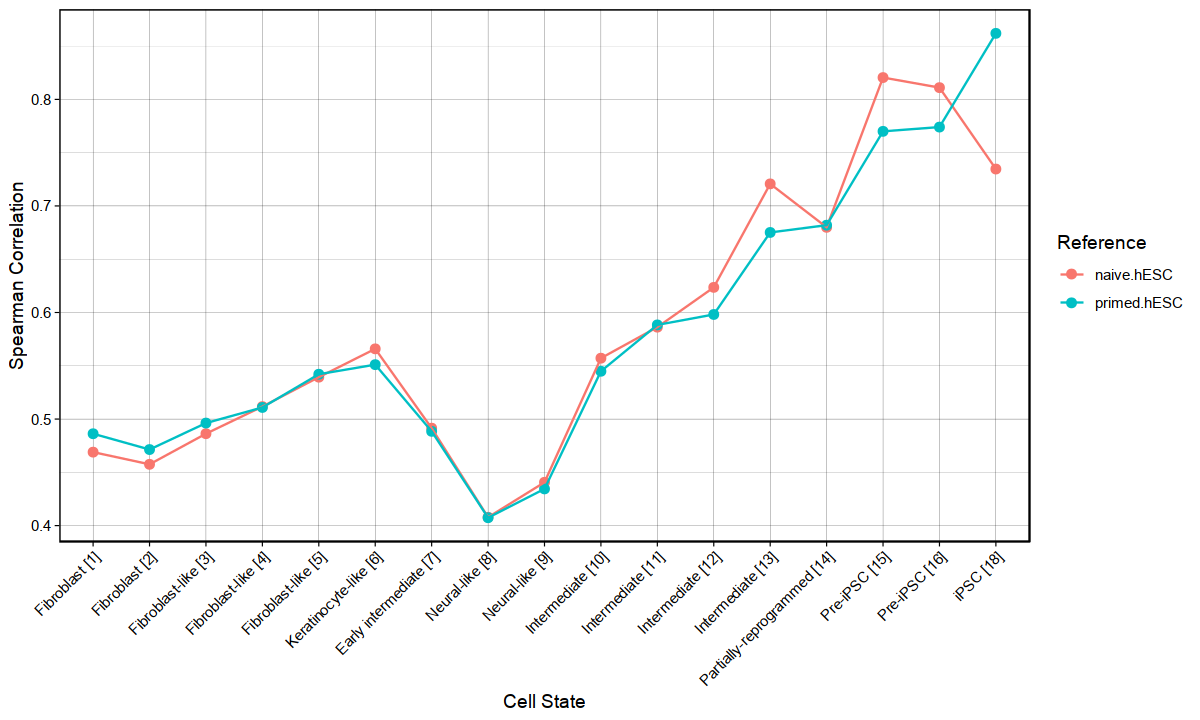

In [16]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(melt(spearman_corrs)) +
geom_point(aes(x=factor(Var2), y=value, group=Var1, colour=Var1), size=2) +
geom_line(aes(x=factor(Var2), y=value, group=Var1, colour=Var1)) +
scale_color_discrete(name="Reference")+ 
ylab("Spearman Correlation") +
xlab("Cell State") +
scale_x_discrete(labels=paste(cluster_config[order(cluster_config$new_cluster),]$description[as.numeric(colnames(cts))], 
                              sprintf("[%s]", colnames(cts)), sep=' ')) +
theme_linedraw()+
theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1))

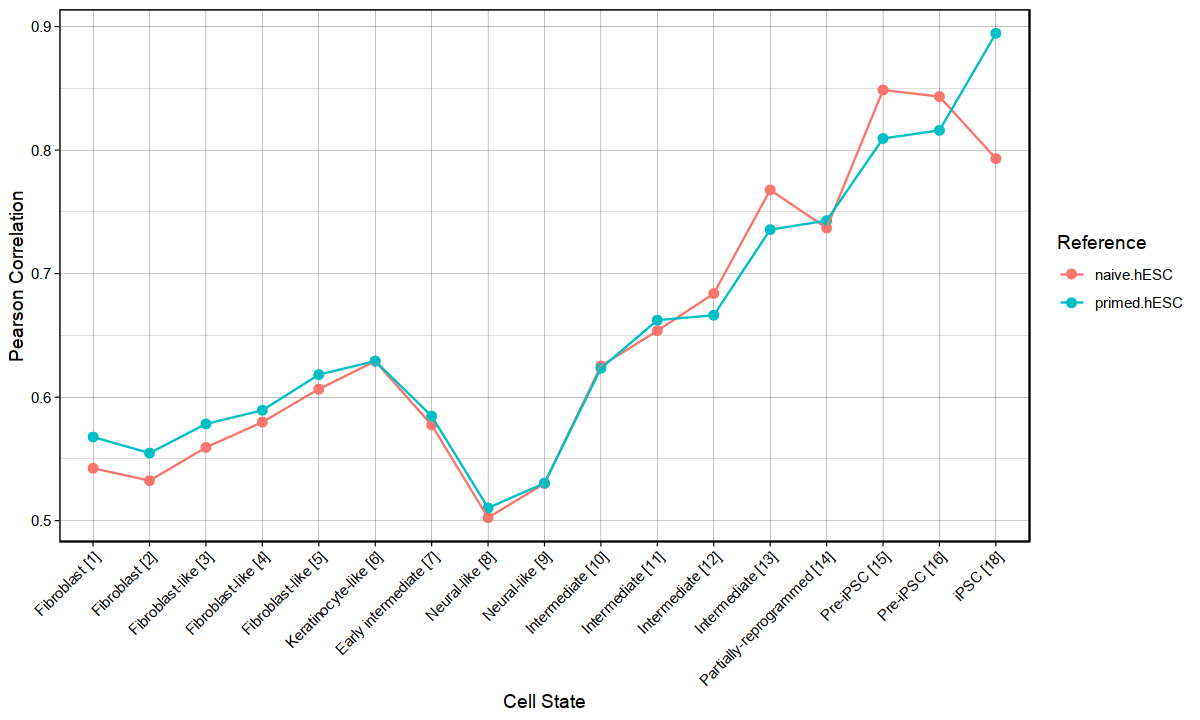

In [18]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(melt(pearson_corrs)) +
geom_point(aes(x=factor(Var2), y=value, group=Var1, colour=Var1), size=2) +
geom_line(aes(x=factor(Var2), y=value, group=Var1, colour=Var1)) +
scale_color_discrete(name="Reference")+ 
ylab("Pearson Correlation") +
xlab("Cell State") +
scale_x_discrete(labels=paste(cluster_config[order(cluster_config$new_cluster),]$description[as.numeric(colnames(cts))], 
                              sprintf("[%s]", colnames(cts)), sep=' ')) +
theme_linedraw()+
theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1))

---

In [11]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reshape2_1.4.4 ggplot2_3.3.0 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6     pillar_1.4.3     compiler_3.6.3   plyr_1.8.6      
 [5] base64enc_0.1-3  tools_3.6.3      digest_0.6.25    uuid_0.1-4      
 [9] jsonlite_1.6.1   evaluate_0.14    lifecycle_0.2.0  tibble_3.0.0    
[1